In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Image Classification with custom dataset
## By Manasa Jagannadan

# importing the daset from my Google Drive

In [2]:
!unzip '/content/drive/My Drive/Dataset.zip'

Archive:  /content/drive/My Drive/Dataset.zip
   creating: Dataset/
  inflating: Dataset/.DS_Store       
   creating: Dataset/test/
  inflating: Dataset/test/.DS_Store  
  inflating: Dataset/test/1051.png   
  inflating: Dataset/test/1052.png   
  inflating: Dataset/test/4043.png   
  inflating: Dataset/test/4050.png   
  inflating: Dataset/test/4051.png   
  inflating: Dataset/test/4052.png   
  inflating: Dataset/test/6052.png   
  inflating: Dataset/test/6053.png   
  inflating: Dataset/test/C052.png   
  inflating: Dataset/test/C053.png   
  inflating: Dataset/test/Test_original_1051.png_271f7fb1-f0ab-4ca7-9dae-a352fd0ed8b9.png  
  inflating: Dataset/test/Test_original_1052.png_22a82512-5b1f-4072-a4af-9a8af40653f0.png  
  inflating: Dataset/test/Test_original_1052.png_b95bc311-bae0-48a7-8b9f-d0eddf1ddf2b.png  
  inflating: Dataset/test/Test_original_4043.png_615f9058-5c5c-4430-9f11-debd66f8a19a.png  
  inflating: Dataset/test/Test_original_4043.png_fffcbc29-3aff-40c0-bdf9-2c12fa6d

## giving the path to train dataset

In [0]:
DATADIR="/content/Dataset/train"
CATEGORIES=["category 1","category 2","category 3","category 4"]

# Importing all the required packages 

# Keras: 
1. keras is the backend for tensorflow framework

# OS:
1. OS package is used to define the path
2. Is to access the storage path

# cv2:
1. cv2 is the package which is used for loading images

# Convolution:
1. conolution is used to compres the image

# Maxpooling:
1. which is used for pooling layers and here we are taking the maxpooling for  to take higest image in the matrix

# Dense:
1. Dense layer will act as fully connected layer to the model.

# Dropout:
1. Dropout is used to avoid overfitting

# Faltten:
1. is used to flatterning the images

# BatchNormalization:
1. Is used for stability and high performance

# Activation:
1. is used for defining activation functions such as softmax,sigmoid, reLu, Leacky Relu

# to_categorical:
1. is used to create onehot encoding to label data

# RMSProp:
1. using as an optimizer

# numpy 
1. is used for numerical operations.

# matplotlib:
1. is for ploting images and graphs

In [0]:
import keras
import os
import cv2
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Input,BatchNormalization,Activation,AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Model
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.layers import Reshape
from keras.callbacks import LearningRateScheduler
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 50:
        lrate = 0.0005
    if epoch > 75:
        lrate = 0.0003
    return lrate

## Loading the data from traing images, all the Images into one array, corresponding labels into anothe array

## and resizing the images 512x512

In [7]:
training_data=[]
training_label=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(512,512))
                training_data.append(new_array)
                training_label.append(class_num)
            except:
                    pass
create_training_data()
print(len(training_data))
print(len(training_label))

440
440


## converting data to numpy arrays

In [8]:
training_data=np.array(training_data)
training_label=np.array(training_label)

print(training_data.shape)
print(training_label.shape)

(440, 512, 512, 3)
(440,)


## Splitting the training data into two parts 
## for validation training data 

In [0]:
x_train, x_val, y_train, y_val = train_test_split(training_data, training_label, test_size=0.1, random_state=10)

In [10]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(396, 512, 512, 3)
(44, 512, 512, 3)
(396,)
(44,)


In [13]:
classes = np.unique(y_train)
print('Total number of outputs : ', len(classes))

Total number of outputs :  4


## Normalizing the dataset for so that the neural network can easily able to predict values between 0,1.
## Applying one hot encoding for traning and validation labels

In [0]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_val /= 255

y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)

(512, 512, 3)


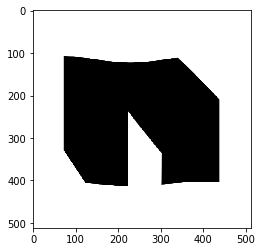

[1. 0. 0. 0.]


In [15]:
i=100
print(x_train[i].shape)

plt.imshow(x_train[i])
plt.show()
print(y_train_one_hot[i])

## Below the model is created.
1. With 8 convolution layers, and 5 fully connected layers and max pooling, activation as relu
2. using 3x3 kernal.

## Try to finding the acuuracy using the model

In [17]:
 
weight_decay = 1e-4
model = Sequential()

model.add(Conv2D(16, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(16, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))
 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 512, 512, 16)      448       
_________________________________________________________________
activation_9 (Activation)    (None, 512, 512, 16)      0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 512, 512, 16)      64        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 512, 512, 16)      2320      
_________________________________________________________________
activation_10 (Activation)   (None, 512, 512, 16)      0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 512, 512, 16)      64        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 256, 256, 16)     

## RMSprop as optimizer with loss function as categorical_crossentroply.
1. and using **.fit** to fitting the model for accuracy. 

In [18]:
rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)

model.compile(loss='categorical_crossentropy',optimizer=rms,metrics=['accuracy'])

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=0.0001,mode='min')

callbacks_list = [reduce_lr,LearningRateScheduler(lr_schedule)]

batch_size=32

epochs=100
history=model.fit(x_train,y_train_one_hot,batch_size=batch_size,epochs=epochs,verbose=1,callbacks=callbacks_list,validation_data=(x_val,y_val_one_hot))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 396 samples, validate on 44 samples
Epoch 1/100
396/396 [==============================] - 24s 61ms/step - loss: 9.7759 - acc: 0.2929 - val_loss: 8.4656 - val_acc: 0.4773
Epoch 2/100
396/396 [==============================] - 7s 18ms/step - loss: 6.5729 - acc: 0.5253 - val_loss: 7.6883 - val_acc: 0.5000
Epoch 3/100
396/396 [==============================] - 7s 18ms/step - loss: 6.8449 - acc: 0.5076 - val_loss: 7.9612 - val_acc: 0.4773
Epoch 4/100
396/396 [==============================] - 7s 18ms/step - loss: 4.1848 - acc: 0.6641 - val_loss: 3.9541 - val_acc: 0.6364
Epoch 5/100
396/396 [==============================] - 7s 18ms/step - loss: 3.2484 - acc: 0.7298 - val_loss: 3.1204 - val_acc: 0.7500
Epoch 6/100
396/396 [==============================] - 7s 18ms/step - loss: 2.4704 - acc: 0.7702 - val_loss: 8.1197 - val_acc: 0.4773
Epoch 7/100
396/396 [==============================]